In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from os import system

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Exploration / Cleaning / Wrangling

In [2]:
#Reading data
banking_data = pd.read_csv('bank-full.csv')
df_orig = pd.DataFrame(banking_data)

#Creating copy and maintain the original dataset
df = df_orig.copy()
df.info()

print("Shape of data is - ",np.shape(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Shape of data is -  (45211, 17)


- Datatype of each attribute is listed. 
- There are 17 attributes and 45.2K records

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [22]:
df[df["balance"]<0].shape

(3766, 17)

- By looking at the data we understood that balance column has negative values. 
- Age of customer lies between 33 and 48 majority number of times.
- Max value in balance is way more than 75th percentile. Same is with duration, campaign, pdays and previous.

In [23]:
#Checking for missing values
df.isna().apply(pd.value_counts)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
False,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211


In [24]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

- No missing values as such in the dataset. But we have unknown values for some columns.

In [55]:
df['Target'].value_counts(normalize = True)*100

0    88.30152
1    11.69848
Name: Target, dtype: float64

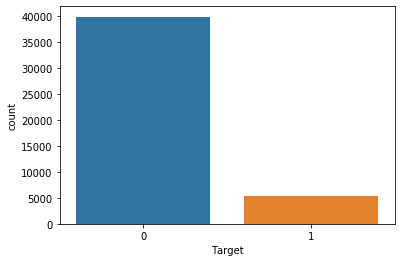

In [34]:
sns.countplot(df['Target'])

- We observe the target class imbalance, only 11.6% customers have subscribed for term deposit. 

# Multivariate analysis

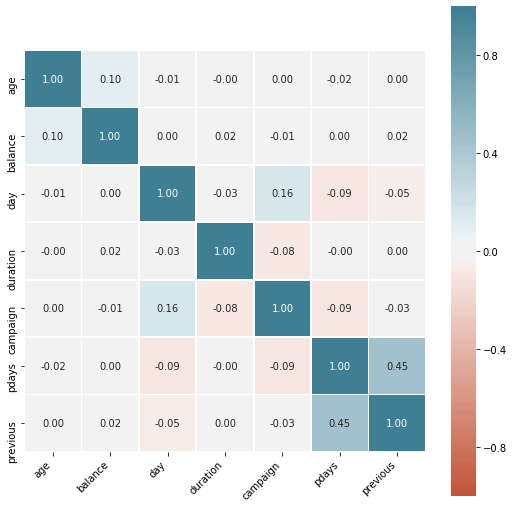

In [26]:
corr = df.corr()
plt.figure(figsize=(9,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, fmt='.2f', annot_kws={'size': 10},
    linewidths=0.8
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Perparing data

In [3]:
columns = df.loc[:, df.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Total values count for following categories in {cols} is \n{df[cols].value_counts()}\n')

Total values count for following categories in job is 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Total values count for following categories in marital is 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Total values count for following categories in education is 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Total values count for following categories in default is 
no     44396
yes      815
Name: default, dtype: int64

Total values count for following categories in housing is 
yes    25130
no     20081
Name: housing, dtype: int64

Total values count for following categories in loan is 
no     37967
yes     7244
Name: loan, dtype: int64

Total valu

- We observe unknown values in jobs, education, contact and poutcome.
- Lot of unknown values from previous campaign are present. 
- We woulnd't handle the unknown value yet. 

In [4]:
# Replace values in some of the categorical columns
# Rest will be One hot encoded. 
replace_values = {'education': {'unknown': -1, 'primary': 1, 'secondary': 2, 'tertiary': 3},'Target': {'no': 0, 'yes': 1},
                  'default': {'no': 0, 'yes': 1}, 'housing': {'no': 0, 'yes': 1}, 'loan': {'no': 0, 'yes': 1},
                  'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
                            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}

df = df.replace(replace_values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null int64
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: int64(13), object(4)
memory usage: 5.9+ MB


# Univariate Analysis

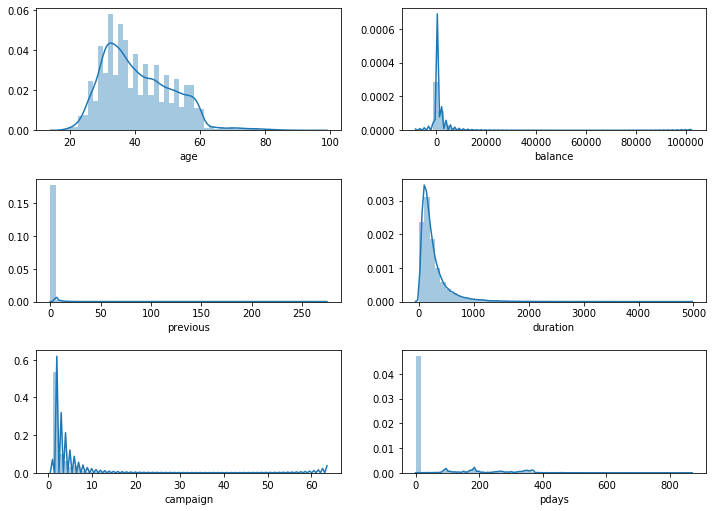

In [30]:
plt.figure(figsize=(12,18))
plt.subplot(6,2,1)
sns.distplot(df["age"])
plt.subplot(6,2,2)
sns.distplot(df["balance"])
plt.subplot(6,2,3)
sns.distplot(df["previous"])
plt.subplot(6,2,4)
sns.distplot(df["duration"])
plt.subplot(6,2,5)
sns.distplot(df["campaign"])
plt.subplot(6,2,6)
sns.distplot(df["pdays"])
plt.subplots_adjust(hspace=0.4)
plt.show()

- All the continuous columns are hignly skewed except age.
- Age distribution is majorly between 30 and 50
- Majority values in previous and pdays are 0.

In [31]:
df.skew()

age           0.684818
education    -1.377996
default       7.245375
balance       8.360308
housing      -0.224766
loan          1.852617
day           0.093079
month         0.242842
duration      3.144318
campaign      4.898650
pdays         2.615715
previous     41.846454
Target        2.383480
dtype: float64

- We observe high skewness for previous, balance and campaign.

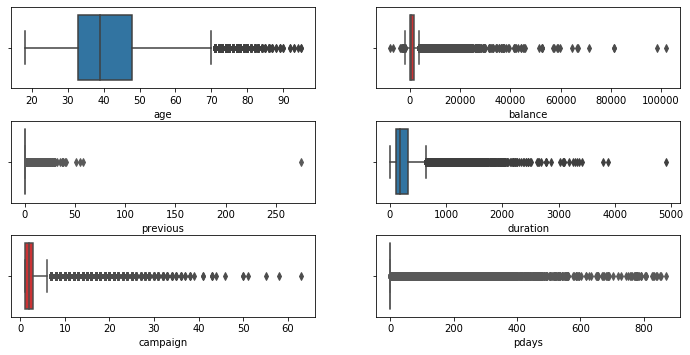

In [32]:
plt.figure(figsize= (12,12))
plt.subplot(6,2,1)
sns.boxplot(df["age"])
plt.subplot(6,2,2)
sns.boxplot(df["balance"], orient="h", palette="Set1")
plt.subplot(6,2,3)
sns.boxplot(df["previous"], orient="h", palette="Set2")
plt.subplot(6,2,4)
sns.boxplot(df["duration"])
plt.subplot(6,2,5)
sns.boxplot(df["campaign"], orient="h", palette="Set1")
plt.subplot(6,2,6)
sns.boxplot(df["pdays"], orient="h", palette="Set2")
plt.subplots_adjust(hspace=0.4)
plt.show()

- Boxplot clearly identifies the outliers for continuous columns.
- There is one definite outlier in previous which we will handle. 
- Will ignore age outliers since they are valid. 
- It is possible that the sales person may feed in incorrect data for previous and pdays and also campaign attributes. 
- Most values of pdays and previous are 0 

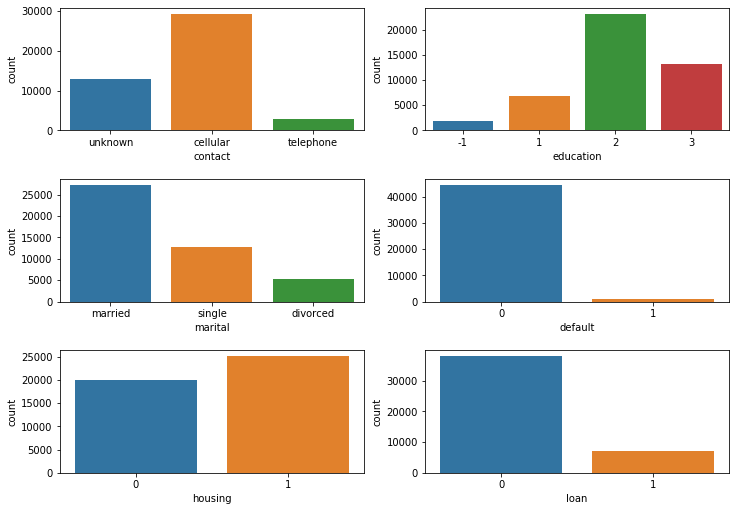

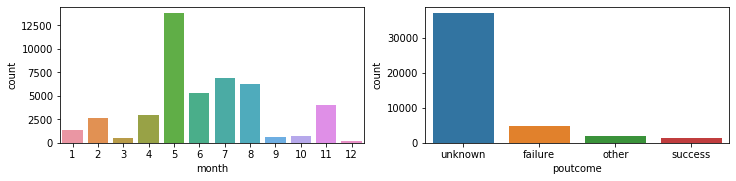

In [33]:
plt.figure(figsize=(12,18))
plt.subplot(6,2,1)
sns.countplot(x="contact", data=df)
plt.subplot(6,2,2)
sns.countplot(x="education", data=df)
plt.subplot(6,2,3)
sns.countplot(x="marital", data=df)
plt.subplot(6,2,4)
sns.countplot(x="default", data=df)
plt.subplot(6,2,5)
sns.countplot(x="housing", data=df)
plt.subplot(6,2,6)
sns.countplot(x="loan", data=df)
plt.subplots_adjust(hspace=0.4)
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.countplot(x="month", data=df)
plt.subplot(2,2,2)
sns.countplot(x="poutcome", data=df)
plt.subplots_adjust(hspace=0.4)
plt.show()

- Count plots tells us that in the givin dataset which class has more records. 
- More customers have completed secondary education
- More customers are married and use cellular contact.
- Majory customers have not defaulted not taken loan previously.


# Bivariate Analysis with Target 

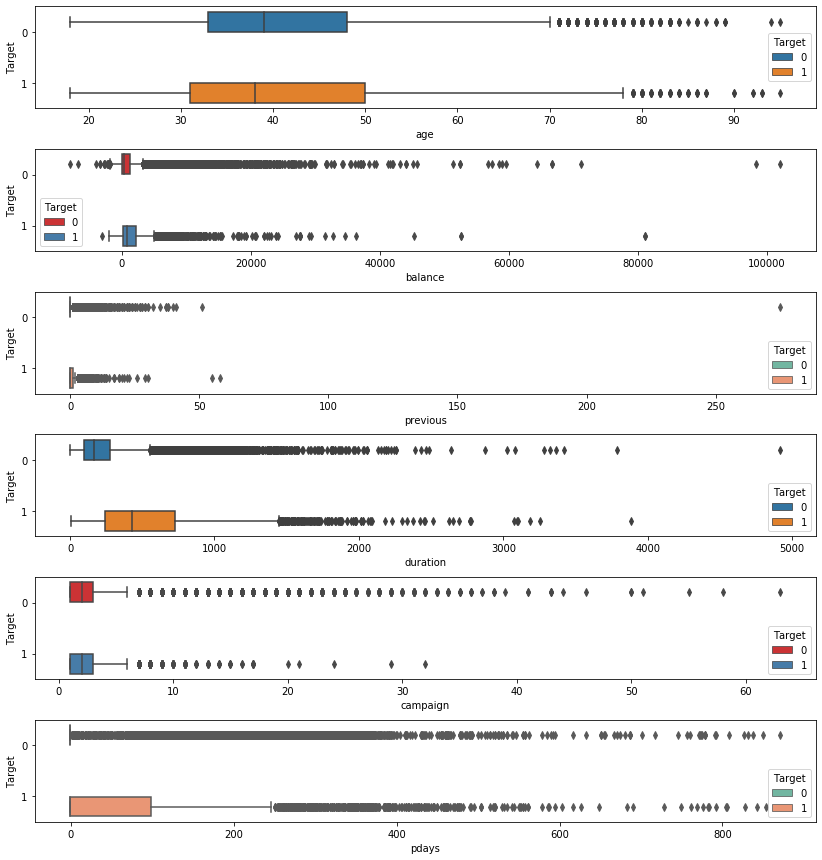

In [35]:
plt.figure(figsize= (14,15))
plt.subplot(6,1,1)
sns.boxplot(x="age",y="Target",hue="Target",data=df)
plt.subplot(6,1,2)
sns.boxplot(x="balance",y="Target",hue="Target",data=df, orient="h", palette="Set1")
plt.subplot(6,1,3)
sns.boxplot(x="previous",y="Target",hue="Target",data=df, orient="h", palette="Set2")
plt.subplot(6,1,4)
sns.boxplot(x="duration",y="Target",hue="Target",data=df)
plt.subplot(6,1,5)
sns.boxplot(x="campaign",y="Target",hue="Target",data=df, orient="h", palette="Set1")
plt.subplot(6,1,6)
sns.boxplot(x="pdays",y="Target",hue="Target",data=df, orient="h", palette="Set2")
plt.subplots_adjust(hspace=0.4)
plt.show()

- We see that duration has impact on target attribute where if the duration is more, then customer is more likely to suscribe

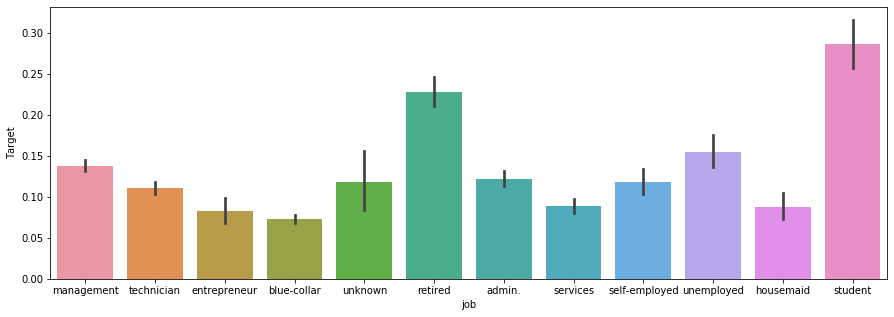

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.barplot(x="job",y=df.Target,data=df)

- Students and Retired people are more likely to subscribe.

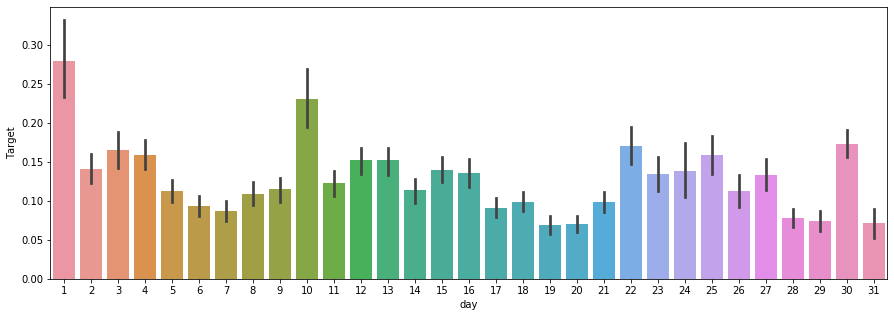

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.barplot(x="day",y=df.Target,data=df)

- More subscriptions are done at the beginning and at the 10th day of the month 

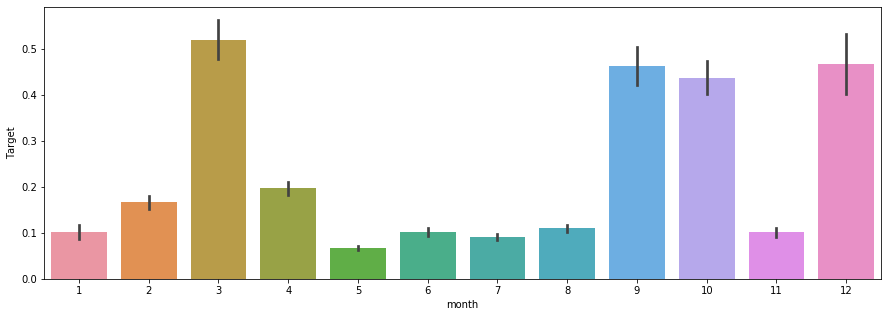

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.barplot(x="month",y=df.Target,data=df)

- We can infer that at the end of the year there are more customers who subscribe.

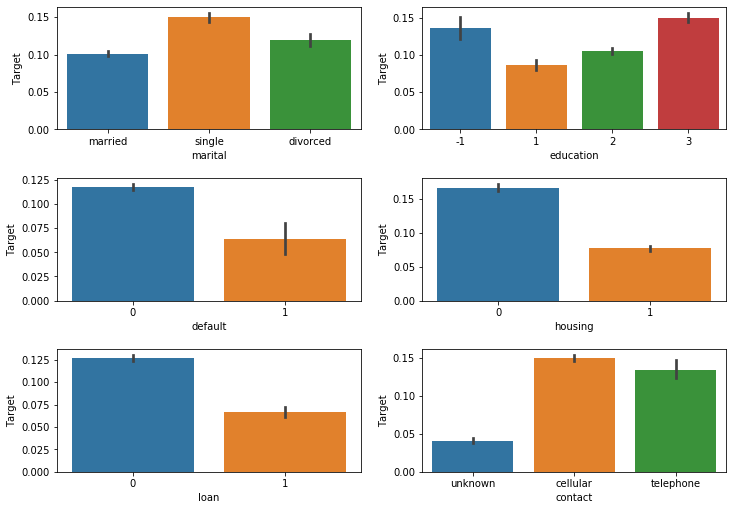

In [9]:
plt.figure(figsize=(12,18))
plt.subplot(6,2,1)
sns.barplot(x="marital",y="Target", data=df)
plt.subplot(6,2,2)
sns.barplot(x="education",y="Target", data=df)
plt.subplot(6,2,3)
sns.barplot(x="default",y="Target", data=df)
plt.subplot(6,2,4)
sns.barplot(x="housing",y="Target",data=df)
plt.subplot(6,2,5)
sns.barplot(x="loan",y="Target", data=df)
plt.subplot(6,2,6)
sns.barplot(x="contact",y="Target", data=df)
plt.subplots_adjust(hspace=0.4)
plt.show()


- Barplot with categorical varible along with target variable are very intutive.
- We can say that single customer are more likly to subscribe for term deposit.
- similarly, customers with no housing or personal loan are more likely to subscribe.
- Customers who are contacted via cellphone are likely to subscribe. 
- As the education level increase of a customer, he/she is more likely to subscribe. 

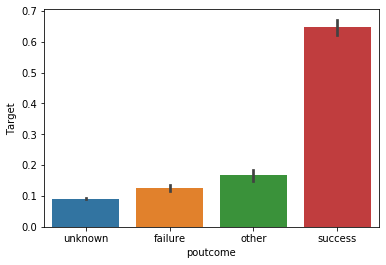

In [11]:
sns.barplot(x="poutcome",y="Target", data=df)

- From previous campaign, the poutcome says that people who had subscibed earlier are most likely to subscribe now. 

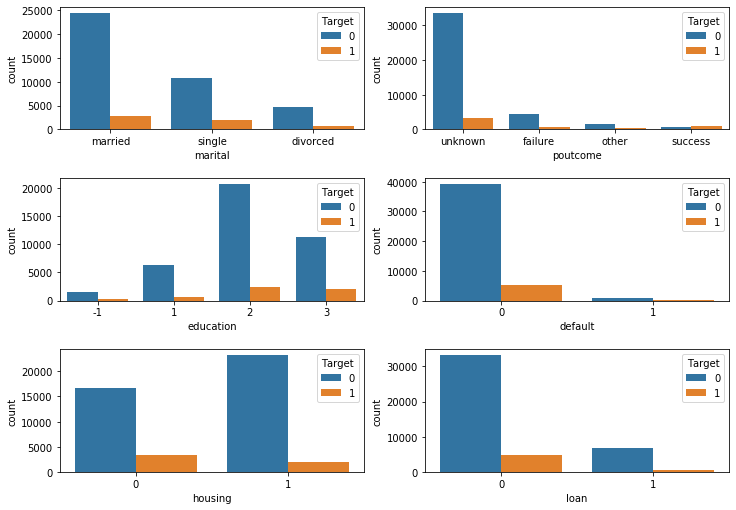

In [12]:
plt.figure(figsize=(12,18))
plt.subplot(6,2,1)
sns.countplot(x="marital",hue="Target", data=df)
plt.subplot(6,2,2)
sns.countplot(x="poutcome",hue="Target", data=df)
plt.subplot(6,2,3)
sns.countplot(x="education",hue="Target", data=df)
plt.subplot(6,2,4)
sns.countplot(x="default",hue="Target",data=df)
plt.subplot(6,2,5)
sns.countplot(x="housing",hue="Target", data=df)
plt.subplot(6,2,6)
sns.countplot(x="loan",hue="Target", data=df)
plt.subplots_adjust(hspace=0.4)
plt.show()

In [13]:
# Outlier, distribution for 'age' column
Q3 = df['age'].quantile(0.75)
Q1 = df['age'].quantile(0.25)
IQR = Q3 - Q1

print('Age column')
display(df.loc[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))])

Age column


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,83,retired,married,1,0,425,0,0,telephone,2,2,912,1,-1,0,unknown,0
29261,75,retired,divorced,1,0,46,0,0,cellular,2,2,294,1,-1,0,unknown,0
29263,75,retired,married,1,0,3324,0,0,cellular,2,2,149,1,-1,0,unknown,0
29322,83,retired,married,3,0,6236,0,0,cellular,2,2,283,2,-1,0,unknown,0
29865,75,retired,divorced,1,0,3881,1,0,cellular,4,2,136,3,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45163,71,retired,married,2,0,2064,0,0,cellular,9,11,379,2,92,3,failure,0
45191,75,retired,divorced,3,0,3810,1,0,cellular,16,11,262,1,183,1,failure,1
45204,73,retired,married,2,0,2850,0,0,cellular,17,11,300,1,40,8,failure,1
45207,71,retired,divorced,1,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown,1


In [14]:
# Outlier, distribution for 'age' column
Q3 = df['balance'].quantile(0.75)
Q1 = df['balance'].quantile(0.25)
IQR = Q3 - Q1

print('balance column')
display(df.loc[(df['balance'] < (Q1 - 1.5 * IQR)) | (df['balance'] > (Q3 + 1.5 * IQR))])

balance column


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
34,51,management,married,3,0,10635,1,0,unknown,5,5,336,1,-1,0,unknown,0
65,51,management,married,3,0,6530,1,0,unknown,5,5,91,1,-1,0,unknown,0
69,35,blue-collar,single,2,0,12223,1,1,unknown,5,5,177,1,-1,0,unknown,0
70,57,blue-collar,married,2,0,5935,1,1,unknown,5,5,258,1,-1,0,unknown,0
186,40,services,divorced,-1,0,4384,1,0,unknown,5,5,315,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45164,35,services,married,3,0,4655,0,0,cellular,9,11,111,2,-1,0,unknown,0
45181,46,blue-collar,married,2,0,6879,0,0,cellular,15,11,74,2,118,3,failure,0
45185,60,services,married,3,0,4256,1,0,cellular,16,11,200,1,92,4,success,1
45191,75,retired,divorced,3,0,3810,1,0,cellular,16,11,262,1,183,1,failure,1


In [15]:
# Outlier, distribution for 'age' column
Q3 = df['duration'].quantile(0.75)
Q1 = df['duration'].quantile(0.25)
IQR = Q3 - Q1

print('duration column', '--'*55)
display(df.loc[(df['duration'] < (Q1 - 1.5 * IQR)) | (df['duration'] > (Q3 + 1.5 * IQR))])

duration column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
37,53,technician,married,2,0,-3,0,0,unknown,5,5,1666,1,-1,0,unknown,0
43,54,retired,married,2,0,529,1,0,unknown,5,5,1492,1,-1,0,unknown,0
53,42,admin.,single,2,0,-76,1,0,unknown,5,5,787,1,-1,0,unknown,0
59,46,services,married,1,0,179,1,0,unknown,5,5,1778,1,-1,0,unknown,0
61,53,technician,divorced,2,0,989,1,0,unknown,5,5,812,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45124,27,blue-collar,single,1,0,232,1,0,cellular,26,10,701,2,-1,0,unknown,1
45199,34,blue-collar,single,2,0,1475,1,0,cellular,16,11,1166,3,530,12,other,0
45200,38,technician,married,2,0,557,1,0,cellular,16,11,1556,4,-1,0,unknown,1
45206,51,technician,married,3,0,825,0,0,cellular,17,11,977,3,-1,0,unknown,1


In [16]:
# Outlier, distribution for 'age' column
Q3 = df['campaign'].quantile(0.75)
Q1 = df['campaign'].quantile(0.25)
IQR = Q3 - Q1

print('campaign column')
display(df.loc[(df['campaign'] < (Q1 - 1.5 * IQR)) | (df['campaign'] > (Q3 + 1.5 * IQR))])

campaign column


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
758,59,services,married,2,0,307,1,1,unknown,6,5,250,7,-1,0,unknown,0
780,30,admin.,married,2,0,4,0,0,unknown,7,5,172,8,-1,0,unknown,0
906,27,services,single,2,0,0,1,0,unknown,7,5,388,7,-1,0,unknown,0
1103,52,technician,married,-1,0,133,1,0,unknown,7,5,253,8,-1,0,unknown,0
1105,43,admin.,married,3,0,1924,1,0,unknown,7,5,244,7,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44666,25,technician,single,2,0,1298,0,0,cellular,2,9,206,7,94,2,other,0
44680,27,self-employed,single,3,0,560,0,0,telephone,3,9,543,9,465,2,failure,0
44770,37,services,single,3,0,1189,0,0,cellular,13,9,323,9,199,4,other,1
44886,38,management,married,3,0,0,0,0,cellular,24,9,246,12,197,6,failure,0


In [17]:
# Outlier, distribution for 'age' column
Q3 = df['previous'].quantile(0.75)
Q1 = df['previous'].quantile(0.25)
IQR = Q3 - Q1

print('previous column')
display(df.loc[(df['previous'] < (Q1 - 1.5 * IQR)) | (df['previous'] > (Q3 + 1.5 * IQR))])

previous column


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,3,0,882,0,0,telephone,21,10,39,1,151,3,failure,0
24062,42,admin.,single,2,0,-247,1,1,telephone,21,10,519,1,166,1,other,1
24064,33,services,married,2,0,3444,1,0,telephone,21,10,144,1,91,4,failure,1
24072,36,management,married,3,0,2415,1,0,telephone,22,10,73,1,86,4,other,0
24077,36,management,married,3,0,0,1,0,telephone,23,10,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,2,0,1475,1,0,cellular,16,11,1166,3,530,12,other,0
45201,53,management,married,3,0,583,0,0,cellular,17,11,226,1,184,4,success,1
45204,73,retired,married,2,0,2850,0,0,cellular,17,11,300,1,40,8,failure,1
45208,72,retired,married,2,0,5715,0,0,cellular,17,11,1127,5,184,3,success,1


In [5]:
# Convert columns to categorical types
columns.extend(['day'])
for cols in columns:
    df[cols] = df[cols].astype('category')

In [6]:
# Removing outliers with upper and lower percentile values
df_n_removed = df.copy(deep = True)
columns = ['balance', 'duration', 'campaign', 'pdays', 'previous']

for col in columns:
    upper_lim = np.percentile(df_n_removed[col].values, 99)
    lower_lim = np.percentile(df_n_removed[col].values, 1)
    df_n_removed.loc[(df_n_removed[col] > upper_lim), col] = np.nan
    df_n_removed.loc[(df_n_removed[col] < lower_lim), col] = np.nan

print('Column for which outliers where removed with upper and lower percentile values: \n', columns)

Column for which outliers where removed with upper and lower percentile values: 
 ['balance', 'duration', 'campaign', 'pdays', 'previous']


In [7]:
df_n_removed.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance      903
housing        0
loan           0
contact        0
day            0
month          0
duration     870
campaign     451
pdays        385
previous     453
poutcome       0
Target         0
dtype: int64

In [8]:
# pd.get_dummies
one_hot_col = ['job', 'marital', 'contact', 'poutcome']
df_ready = pd.get_dummies(df_n_removed, columns = one_hot_col)

print('Got dummies for \n', one_hot_col)
df_ready.info()

Got dummies for 
 ['job', 'marital', 'contact', 'poutcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                  45211 non-null int64
education            45211 non-null category
default              45211 non-null category
balance              44308 non-null float64
housing              45211 non-null category
loan                 45211 non-null category
day                  45211 non-null category
month                45211 non-null category
duration             44341 non-null float64
campaign             44760 non-null float64
pdays                44826 non-null float64
previous             44758 non-null float64
Target               45211 non-null category
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retired          45211 non-null uint8
jo

In [9]:
#convert to float
columns = ['education', 'default', 'housing', 'loan', 'day', 'month', 'Target']
for col in columns:
    df_ready[col] = df_ready[col].astype('float')
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                  45211 non-null int64
education            45211 non-null float64
default              45211 non-null float64
balance              44308 non-null float64
housing              45211 non-null float64
loan                 45211 non-null float64
day                  45211 non-null float64
month                45211 non-null float64
duration             44341 non-null float64
campaign             44760 non-null float64
pdays                44826 non-null float64
previous             44758 non-null float64
Target               45211 non-null float64
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retired          45211 non-null uint8
job_self-employed    45211 non-null uint8
job_services         45211 

In [10]:
from impyute.imputation.cs import mice
df_ready_L = mice(df_ready.values)
df_ready_L = pd.DataFrame(df_ready_L, columns = df_ready.columns)

In [64]:
# Absolute correlation of independent variables with 'Target' i.e. the target variable
absCorrwithDep = []
allVars = df_ready_L.drop('Target', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(df_ready_L['Target'].corr(df_ready_L[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
8,duration,0.398106
32,poutcome_success,0.306788
33,poutcome_unknown,0.167051
11,previous,0.153341
29,contact_unknown,0.150935
4,housing,0.139173
27,contact_cellular,0.135873
10,pdays,0.0865931
17,job_retired,0.0792453
3,balance,0.0769227


- We will dorp last 3 columns since there is barely any correlation.


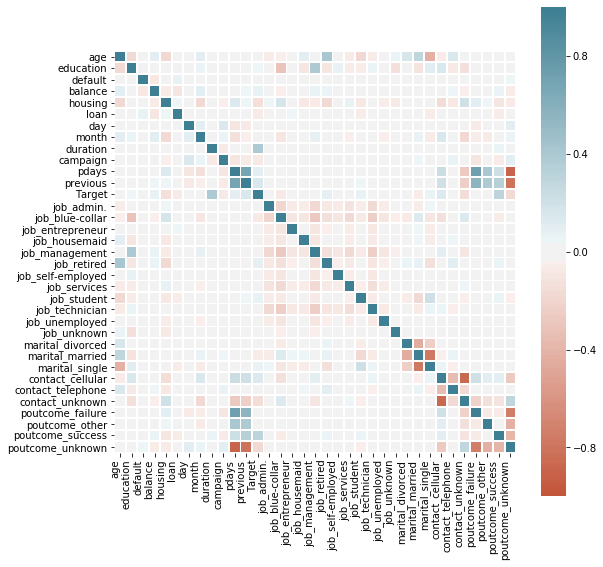

In [65]:
corr = df_ready_L.corr()
plt.figure(figsize=(9,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
   # annot=True, fmt='.2f', #annot_kws={'size': 10},
    linewidths=0.8
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    #rotation=45,
    horizontalalignment='right'
);

- We see that pdays and previous are negatively correlated with poutcome_unknown
- Contact unknown and contact cellular are also negatively correlated.
- We see some positive correaltion between poutcome_failure with pdays and previous.
- pdays and previous are also slight positively correlated

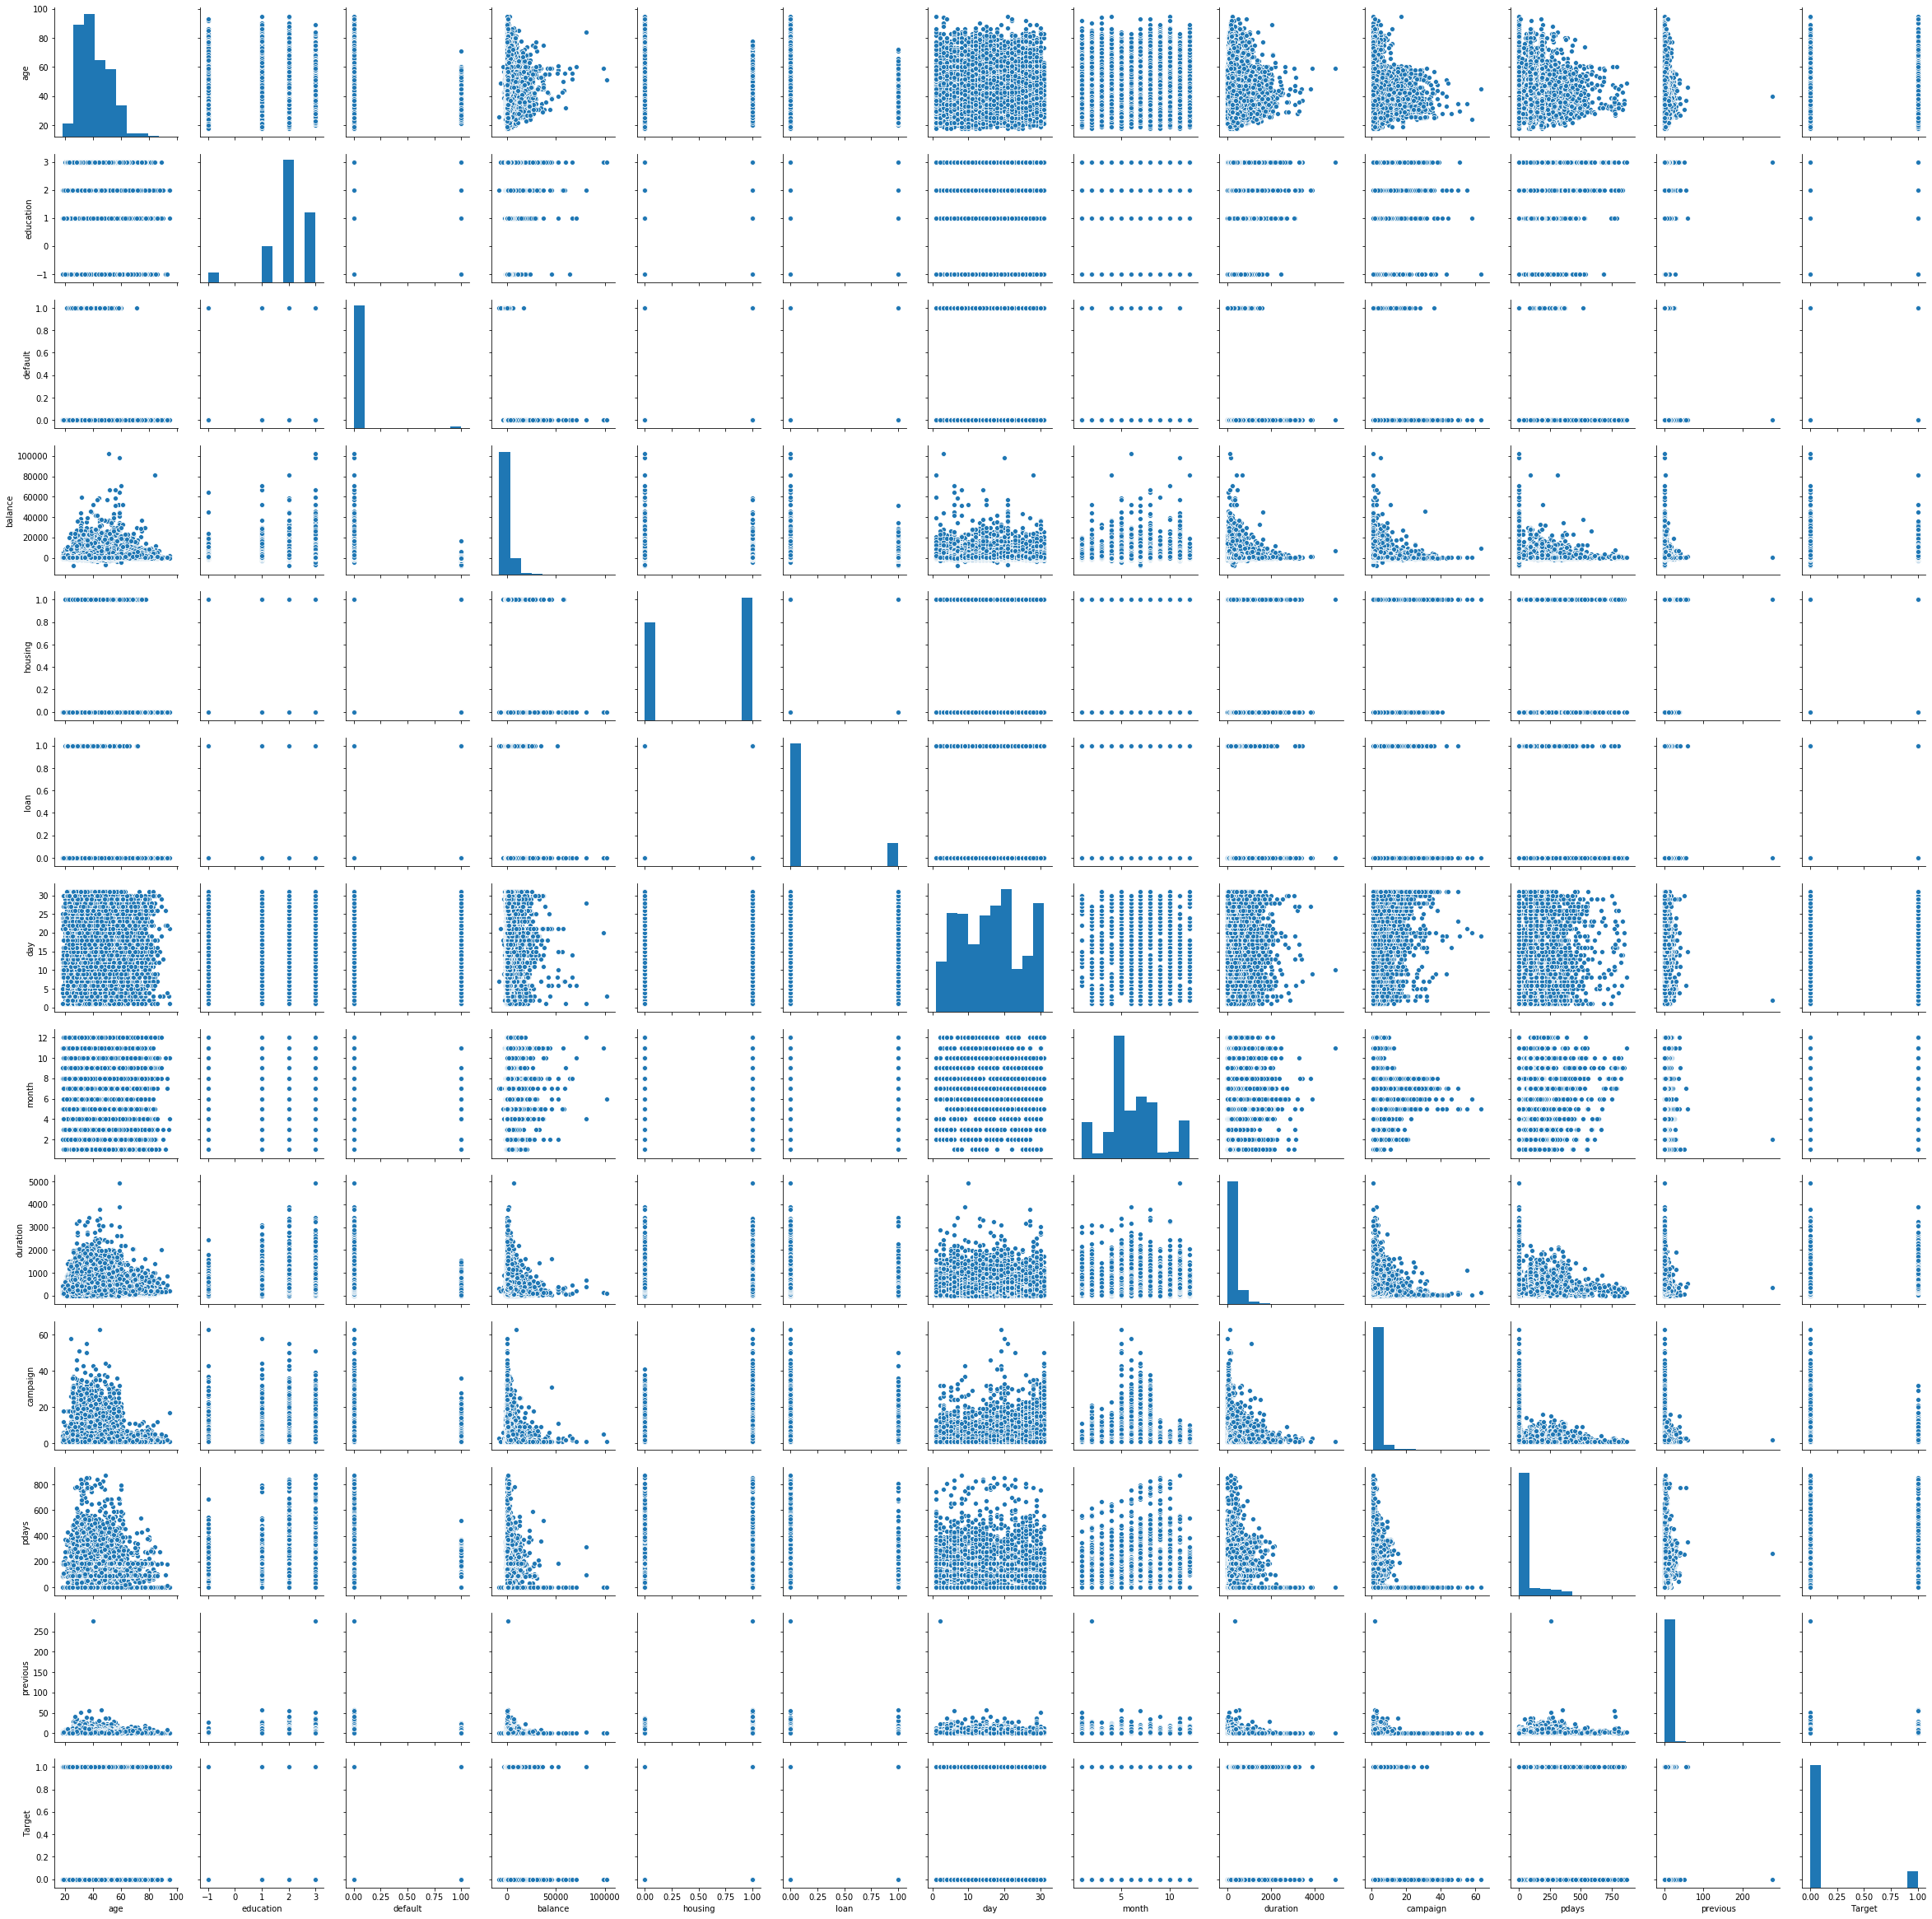

In [200]:
sns.pairplot(df)

# Split data in 70:30 using train_test_split

In [64]:
df_ml = df_ready_L.copy()

X_data = df_ml.drop(columns=["Target","job_unknown","job_self-employed","marital_divorced"])
Y_target = df_ml["Target"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_target, test_size=0.3,random_state=4)

In [66]:
y_test.value_counts()

0.0    12047
1.0     1517
Name: Target, dtype: int64

# Logistic Regression

In [67]:
logreg = LogisticRegression(solver='lbfgs',max_iter=5000)

#Train the model using the training sets
logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logreg.predict(X_test)

print('Training Score: ', logreg.score(X_train, y_train).round(3))
print('Test Score: ', logreg.score(X_test, y_test).round(3))

# Model Accuracy, how often is the classifier correct?
print("Accuracy",metrics.accuracy_score(y_test, y_pred))

#Checking performance our model with ROC Score.
roc_score = roc_auc_score(y_test, y_pred)
print("ROC: ",roc_score)

# Print Classification Report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
# Print Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Training Score:  0.898
Test Score:  0.901
Accuracy 0.9007667354762607
ROC:  0.6476869680764183
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     12047
         1.0       0.61      0.32      0.42      1517

    accuracy                           0.90     13564
   macro avg       0.76      0.65      0.68     13564
weighted avg       0.88      0.90      0.89     13564

[[11730   317]
 [ 1029   488]]


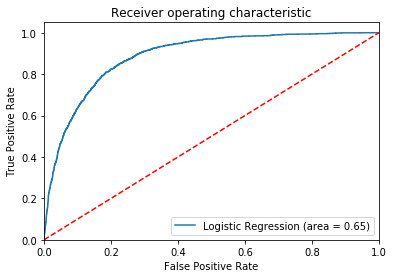

In [68]:
#ROC Curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# KNN Classifier

In [69]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Training Score: ',knn.score(X_train, y_train))
print('Test Score: ',knn.score(X_test, y_test))


#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.8845473311707461
Training Score:  0.9080481562233387
Test Score:  0.8845473311707461
ROC : 0.6178133118369227
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94     12047
         1.0       0.47      0.27      0.35      1517

    accuracy                           0.88     13564
   macro avg       0.69      0.62      0.64     13564
weighted avg       0.86      0.88      0.87     13564

[[11582   465]
 [ 1101   416]]


# Gaussian Naive Bayes

In [70]:
GNB1 = GaussianNB()

#Train the model using the training sets
GNB1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = GNB1.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Training Score: ',GNB1.score(X_train, y_train))
print('Test Score: ',GNB1.score(X_test, y_test))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.8263786493659687
Training Score:  0.8249439125351534
Test Score:  0.8263786493659687
ROC : 0.6896446126544906
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     12047
         1.0       0.33      0.51      0.40      1517

    accuracy                           0.83     13564
   macro avg       0.63      0.69      0.65     13564
weighted avg       0.87      0.83      0.84     13564

[[10430  1617]
 [  738   779]]


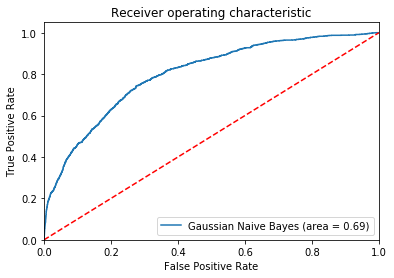

In [71]:
#ROC Curve

logit_roc_auc = roc_auc_score(y_test, GNB1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Base Model

In [72]:
Base_Model = DummyClassifier()

#Train the model using the training sets
Base_Model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = Base_Model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Training Score: ',Base_Model.score(X_train, y_train))
print('Test Score: ',Base_Model.score(X_test, y_test))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


Accuracy: 0.79438218814509
Training Score:  0.7891111321768256
Test Score:  0.7934974933647891
ROC : 0.4976231852622493
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     12047
         1.0       0.11      0.12      0.11      1517

    accuracy                           0.79     13564
   macro avg       0.50      0.50      0.50     13564
weighted avg       0.80      0.79      0.80     13564

[[10600  1447]
 [ 1342   175]]


# Decision Tree

In [73]:
DTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,random_state=1)

#Train the model using the training sets
DTree.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = DTree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Training Score: ',DTree.score(X_train, y_train))
print('Test Score: ',DTree.score(X_test, y_test))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.9031259215570628
Training Score:  0.9005908932916232
Test Score:  0.9031259215570628
ROC : 0.6325937540064325
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     12047
         1.0       0.65      0.28      0.40      1517

    accuracy                           0.90     13564
   macro avg       0.78      0.63      0.67     13564
weighted avg       0.89      0.90      0.89     13564

[[11819   228]
 [ 1086   431]]


In [134]:
train_char_label = ['No', 'Yes']
Target_Tree_File = open('target.dot','w')
dot_data = tree.export_graphviz(DTree, out_file=Target_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Target_Tree_File.close()

In [74]:
feature_importances = pd.DataFrame(DTree.feature_importances_, index = X_train.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending = False)
feature_importances

,Importance
duration,0.578945
poutcome_success,0.300815
age,0.037689
housing,0.031006
contact_unknown,0.020933
pdays,0.009769
month,0.008006
day,0.004049
contact_cellular,0.003300
balance,0.002553


# Ensembling Techniques

# Bagging

In [75]:
bgcl = BaggingClassifier(base_estimator=DTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)


#Train the model using the training sets
bgcl.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = bgcl.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Training Score: ',bgcl.score(X_train, y_train))
print('Test Score: ',bgcl.score(X_test, y_test))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.9038631672073135
Training Score:  0.901317660441748
Test Score:  0.9038631672073135
ROC : 0.6315683261871666
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     12047
         1.0       0.67      0.28      0.40      1517

    accuracy                           0.90     13564
   macro avg       0.79      0.63      0.67     13564
weighted avg       0.89      0.90      0.89     13564

[[11834   213]
 [ 1091   426]]


# AdaBoosting

In [76]:
AdB = AdaBoostClassifier(n_estimators=10, random_state=1)


#Train the model using the training sets
AdB.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = AdB.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Training Score: ',AdB.score(X_train, y_train))
print('Test Score: ',AdB.score(X_test, y_test))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.895532291359481
Training Score:  0.8925016589250165
Test Score:  0.895532291359481
ROC : 0.6525187084490383
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     12047
         1.0       0.55      0.34      0.42      1517

    accuracy                           0.90     13564
   macro avg       0.74      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564

[[11632   415]
 [ 1002   515]]


# GradientBoosting

In [77]:
GBC = GradientBoostingClassifier(n_estimators = 50,random_state=1)


#Train the model using the training sets
GBC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = GBC.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Training Score: ',GBC.score(X_train, y_train))
print('Test Score: ',GBC.score(X_test, y_test))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.9047478619876143
Training Score:  0.9025500047397857
Test Score:  0.9047478619876143
ROC : 0.6502162837390513
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     12047
         1.0       0.65      0.32      0.43      1517

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

[[11783   264]
 [ 1028   489]]


# Random Forrest Classifier

In [78]:
RFC = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)


#Train the model using the training sets
RFC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RFC.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Training Score: ',RFC.score(X_train, y_train))
print('Test Score: ',RFC.score(X_test, y_test))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.9051164848127397
Training Score:  0.9999368028565109
Test Score:  0.9051164848127397
ROC : 0.6835545891752578
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     12047
         1.0       0.62      0.40      0.48      1517

    accuracy                           0.91     13564
   macro avg       0.77      0.68      0.72     13564
weighted avg       0.89      0.91      0.90     13564

[[11673   374]
 [  913   604]]


# Hyper parameter tuning for Random Forest Classifier

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 80, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [6, 14, 22, 30, 38, 47, 55, 63, 71, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000]}


In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 85.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [26]:
rf_random.best_params_

{'n_estimators': 788,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 63,
 'bootstrap': False}

In [29]:
RFC_tuned = RandomForestClassifier(n_estimators = 788, min_samples_split = 5, min_samples_leaf =2,
                                   max_depth =65, bootstrap ='False' ,random_state=1,max_features='sqrt')


#Train the model using the training sets
RFC_tuned.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RFC_tuned.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Training Score: ',RFC_tuned.score(X_train, y_train))
print('Test Score: ',RFC_tuned.score(X_test, y_test))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.9067384252432911
Training Score:  0.971529686858154
Test Score:  0.9067384252432911
ROC : 0.6594035205662026
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     12047
         1.0       0.66      0.34      0.45      1517

    accuracy                           0.91     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.91      0.89     13564

[[11782   265]
 [ 1000   517]]


## Conclusion

The confusion matrix is often used to measure the performance of a classification algorithm, which contains information about the actual and the predicted class.

Precision: When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.
Recall: When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.
f1-score: Harmonic mean of precision and recall.

- Precision would tell us cases where actually the customer didn't subscribe but model predicted it as subscribed.
- Recall would tell us cases where actually customer had subscribed to term deposit but we predicted it as didn't subscribe.

The confusion matrix for class 1 (Subscribed) would look like:
- Predicted: ...................0 (Not Subscribed) |	Predicted: 1 (Subscribed)
- Actual: 0 (Not Subscribed) :	[True Negatives] | [False Positives]
- Actual: 1 (Subscribed) 	:   [False Negatives] |	[True Positives]



- In our case, it would be recall that would hold more importance then precision. So choosing recall for class 1 and f1-score which is the harmonic mean of both precision and recall as evaluation metric, particularly for class 1


## Model Selection

- The target variable is imbalenced. Hence we will observe low recall. 
- Base model had accuracy 0.79 and recall for class 1 as 0.12.
- We've tried various algorithms like Linear reg, Knn (which shouldn't have been used), SVM, Decision tree and ensemble techiques. 
- Best recall for class 1 is observed in Random forest classifier as 0.40 and accuracy as 0.91. Hence we will go with Random forest classifier.
- Also, we notice that the best accuracy is 0.91 for Random forest classifier itself. 
